In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os

In [2]:
articulos, libros = [], []
for i in glob.glob("*.xlsx"):
    print(i)
    a=pd.read_excel(i,sheet_name="Artículos")
    l=pd.read_excel(i,sheet_name="Libros")
    articulos.append(a)
    libros.append(l)
Articulos,Libros=pd.concat(articulos),pd.concat(libros)

Grupo de Investigación en Estudios Sociales y Humanísticos.xlsx
Grupo de Investigación en Justicia Global.xlsx
Grupo de Investigación en Gestión de la Innovación "El Patio".xlsx
GRUPO DE INVESTIGACION EN PRODUCTIVIDAD Y CALIDAD ( GIPC ).xlsx
Grupo de Investigaciones en Sistemas Ambientales e Hidráulicos (GISAH).xlsx
Grupo de Investigación en Energías Alternativas y Fluidos (EOLITO).xlsx
Desarrollo, Salud y Desempeño Humano.xlsx
Gravitación y Matemática Aplicada.xlsx
Grupo de Automatización Industrial y Control - GAICO.xlsx
Instituto de Estudios en Desarrollo Economía y Sostenibilidad - IDEEAS.xlsx
Grupo de Investigación en Materiales y Estructuras Continuas -GIMAT-.xlsx
Grupo de investigación en Estudios Químicos y Biológicos.xlsx
Grupo de Educación e Innovación Educativa.xlsx
Grupo de Investigación en Tecnologías Aplicadas y Sistemas de Información  -GRITAS-.xlsx
Grupo de Física Aplicada y Procesamiento de Imágenes y Señales - FAPIS.xlsx
Ciencia, Investigación, Desarrollo, Innovación 

In [3]:
Articulos

,index,Tipo de Publicación,Título,Revista,ISSN,Año,Volumen,Fascículo,Páginas,DOI,Autores,Grupo
0,0,Publicado en revista especializada,Community cinema as a strategy against violenc...,STREET ART AND URBAN CREATIVITY,2183-9956,2025.0,11.0,NaN,123 - 144,10.62161/sauc.v11.5725,"JAVIER BERNABE FRAGUAS, ADOLFO BALTAR MORENO",Grupo de Investigación en Estudios Sociales y ...
1,1,Publicado en revista especializada,"Paros armados y guerra interna en Colombia, 20...","2000-2022 Colombia, TERRITORIOS",2215-7484,2024.0,51.0,NaN,1 - 34,10.12804/territ,ARMANDO JOSE MERCADO VEGA,Grupo de Investigación en Estudios Sociales y ...
2,2,Publicado en revista especializada,Cómo estaban informando los medios colombianos...,Revista Latinoamericana De Ciencias De La Comu...,1807-3026,2024.0,23.0,45.0,131 - 151,10.55738/alaic.v23i45.1000,TANIA LUCIA COBOS COBOS,Grupo de Investigación en Estudios Sociales y ...
3,3,Publicado en revista especializada,Spurring or Blurring Professional Standards? T...,JOURNALISM MASS COMMUNICATION QUARTERLY,1077-6990,2024.0,101.0,2.0,1 - 32,10.1177/107769902412466,"CLAUDIA MELLADO RUIZ, MIGUEL EFREN GARCES PRETTEL",Grupo de Investigación en Estudios Sociales y ...
4,4,Publicado en revista especializada,Does News Platform Matter? Comparing Online Jo...,"Radio, and Television Reino Unido, DIGITAL JOU...",2167-0811,2024.0,11.0,1.0,1 - 24,10.1080/21670811.2023.2191332,"CLAUDIA MELLADO RUIZ, MIGUEL EFREN GARCES PRET...",Grupo de Investigación en Estudios Sociales y ...
...,...,...,...,...,...,...,...,...,...,...,...,...
23,23,Publicado en revista especializada,"First, second and third order fractional step ...",second and third order fractional step methods...,0021-9991,2015.0,296.0,NaN,113 - 137,10.1016/j.jcp.2015.04.027,ERNESTO FRANCISCO CASTILLO,"Ciencia, Investigación, Desarrollo, Innovación..."
24,24,Publicado en revista especializada,On some time marching schemes for the stabiliz...,COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...,0045-7825,2015.0,296.0,NaN,295 - 326,10.1016/j.cma.2015.07.016,HECTOR GABRIEL ESPINOZA ROMAN,"Ciencia, Investigación, Desarrollo, Innovación..."
25,25,Publicado en revista especializada,"Stability, convergence and accuracy of stabili...",convergence and accuracy of stabilized finite ...,1095-7170,2014.0,52.0,4.0,1729 - 1752,10.1137/130918708,HECTOR GABRIEL ESPINOZA ROMAN,"Ciencia, Investigación, Desarrollo, Innovación..."
26,26,Publicado en revista especializada,A Sommerfeld non-reflecting boundary condition...,COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...,0045-7825,2014.0,276.0,NaN,122 - 148,10.1016/j.cma.2014.03.015,HECTOR GABRIEL ESPINOZA ROMAN,"Ciencia, Investigación, Desarrollo, Innovación..."


In [4]:
import unicodedata

def normalize_author(author):
    author = author.lower().strip()
    author = unicodedata.normalize('NFD', author)
    author = ''.join([c for c in author if unicodedata.category(c) != 'Mn'])  # Quita acentos
    author = ' '.join(sorted(author.split()))  # Ordena nombres para evitar diferente orden
    return author

# Obtener autores únicos
autores_set1 = set()

for autores in Articulos["Autores"]:
    autores_lista1 = autores.split(",")
    for autor in autores_lista1:
        autor_norm = normalize_author(autor)
        autores_set1.add(autor_norm)

# Convertir a lista ordenada para verificar
autores_unicos1 = sorted(list(autores_set1))
print("Autores de artículos únicos normalizados....")
#print(autores_unicos1)

# Obtener autores únicos
autores_set2 = set()

for autores in Libros["Autores"]:
    autores_lista2 = autores.split(",")
    for autor in autores_lista2:
        autor_norm = normalize_author(autor)
        autores_set2.add(autor_norm)

# Convertir a lista ordenada para verificar
autores_unicos2 = sorted(list(autores_set2))
print("Autores de libros únicos normalizados....")
#print(autores_unicos1)

Autores de artículos únicos normalizados....
Autores de libros únicos normalizados....


In [5]:
# Crear un DataFrame vacío con autores únicos y años
anios = sorted(Articulos["Año"].dropna().unique())
conteo_autores_articulos1 = pd.DataFrame(0, index=autores_unicos1, columns=anios)

# Llenar DataFrame con conteos
for _, row in Articulos.iterrows():
    if pd.isna(row["Año"]) or pd.isna(row["Autores"]):
        continue
    anio = row["Año"]
    autores_lista = row["Autores"].split(",")
    for autor in autores_lista:
        autor_norm = normalize_author(autor)
        conteo_autores_articulos1.loc[autor_norm, anio] += 1

# Mostrar tabla final
conteo_autores_articulos1.reset_index(inplace=True)
conteo_autores_articulos1.rename(columns={'index': 'Autor'}, inplace=True)
conteo_autores_articulos1["Suma"]=conteo_autores_articulos1.drop(columns=["Autor"]).sum(axis=1)

#print("Tabla de conteo de publicaciones por autor y año:")
conteo_autores_articulos1=conteo_autores_articulos1.sort_values(by="Suma",ascending=False)

In [6]:
# Crear un DataFrame vacío con autores únicos y años
anios = sorted(Libros["Año"].dropna().unique())
conteo_autores_libros1 = pd.DataFrame(0, index=autores_unicos2, columns=anios)

# Llenar DataFrame con conteos
for _, row in Libros.iterrows():
    if pd.isna(row["Año"]) or pd.isna(row["Autores"]):
        continue
    anio = row["Año"]
    autores_lista = row["Autores"].split(",")
    for autor in autores_lista:
        autor_norm = normalize_author(autor)
        conteo_autores_libros1.loc[autor_norm, anio] += 1

# Mostrar tabla final
conteo_autores_libros1.reset_index(inplace=True)
conteo_autores_libros1.rename(columns={'index': 'Autor'}, inplace=True)
conteo_autores_libros1["Suma"]=conteo_autores_libros1.drop(columns=["Autor"]).sum(axis=1)

#print("Tabla de conteo de publicaciones por autor y año:")
conteo_autores_libros1=conteo_autores_libros1.sort_values(by="Suma",ascending=False)

In [7]:
conteo_autores_articulos1

,Autor,1998.0,1999.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,...,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2025.0,Suma
637,danilo giraldo montoya oscar,0,0,0,0,0,0,0,0,0,...,0,23,41,49,46,6,0,0,0,165
225,andres guillermo hernandez marrugo,0,0,0,0,0,0,0,0,0,...,4,14,14,14,12,7,8,28,1,110
460,camacho collazos oscar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,105
137,alexandra lenny perez romero,0,0,0,0,0,0,0,0,0,...,2,13,10,10,10,2,9,16,0,79
820,gil gonzalez julian walter,0,0,0,0,0,0,0,0,0,...,0,9,28,29,11,1,0,0,0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,j m,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,jairo pacheco perez,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
913,jorge villanueva,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
728,enrique gomez hernandez jaime,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
conteo_autores_libros1

,Autor,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Suma
1,aaron espinosa espinosa,0,0,1,2,0,4,4,0,0,...,0,1,2,2,0,2,0,1,0,41
302,jose luis ramirez villa,0,0,0,0,3,1,1,0,1,...,2,5,7,0,0,0,3,0,0,32
56,alvis arrieta jorge,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,3,0,28
211,cortina del jorge luis rio,0,0,0,1,0,1,0,0,0,...,9,5,0,0,0,0,0,0,0,22
226,de gilma mestre mogollon,0,0,0,0,0,0,0,0,3,...,4,0,0,0,0,0,0,2,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,bolivar caro luis miguel,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
144,borre david jesus ordosgoitia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145,bravo juan sebastian sierra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
147,buelvas laura martinez,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [9]:
conteo_autores_articulos1.to_excel("Estadisticas_Globales_Articulos.xlsx")
conteo_autores_libros1.to_excel("Estadisticas_Globales_Libros.xlsx")

In [10]:
print("DOne...!")

DOne...!


In [15]:
conteo_autores_articulos1[conteo_autores_articulos1["Autor"].str.contains("sierra")]

,Autor,1998.0,1999.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,...,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2025.0,Suma
86,alberto carlos severiche sierra,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,55
649,david porta sierra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,11,8,3,26
428,bravo enrique sierra,0,0,0,0,0,0,0,0,0,...,2,4,1,0,2,0,0,0,0,9
429,bravo juan sebastian sierra,0,0,0,0,0,0,0,0,0,...,0,0,0,4,2,0,3,0,0,9
212,andres del jorge rio sierra,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,2
832,gonzalez humberto jaime sierra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1031,sierra sofia trillos,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
271,antonio gonzalez mauro sierra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
897,javier oscar sierra suarez,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
592,clara d sierra,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


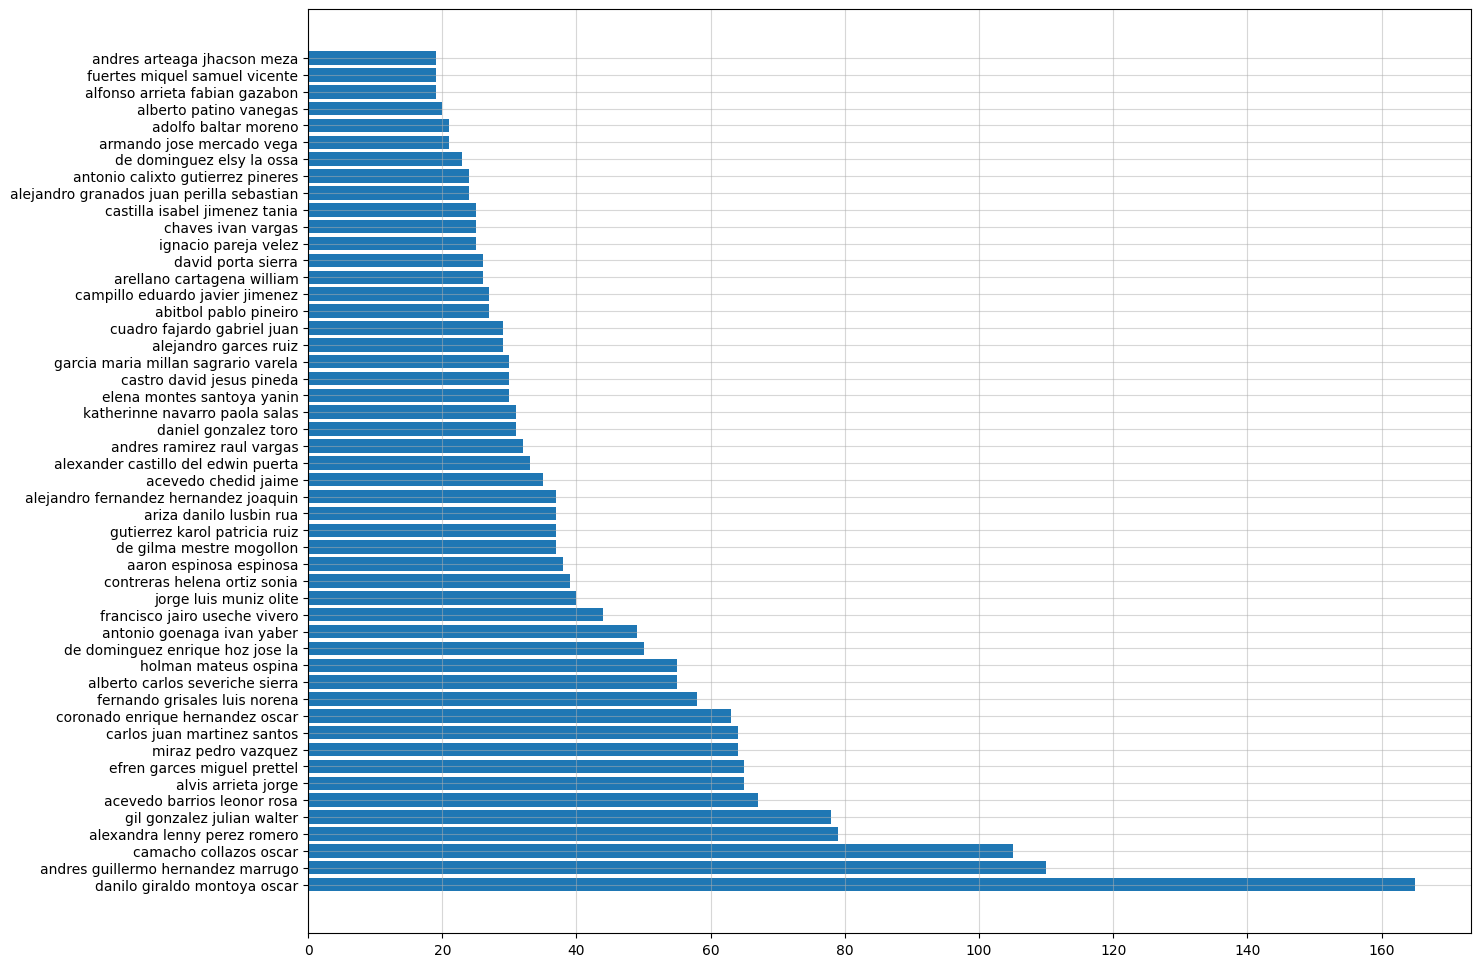

In [27]:
plt.figure(figsize=(15,12))
plt.barh(conteo_autores_articulos1[:50]["Autor"],conteo_autores_articulos1[:50]["Suma"])
plt.grid(alpha=0.5)
plt.show()

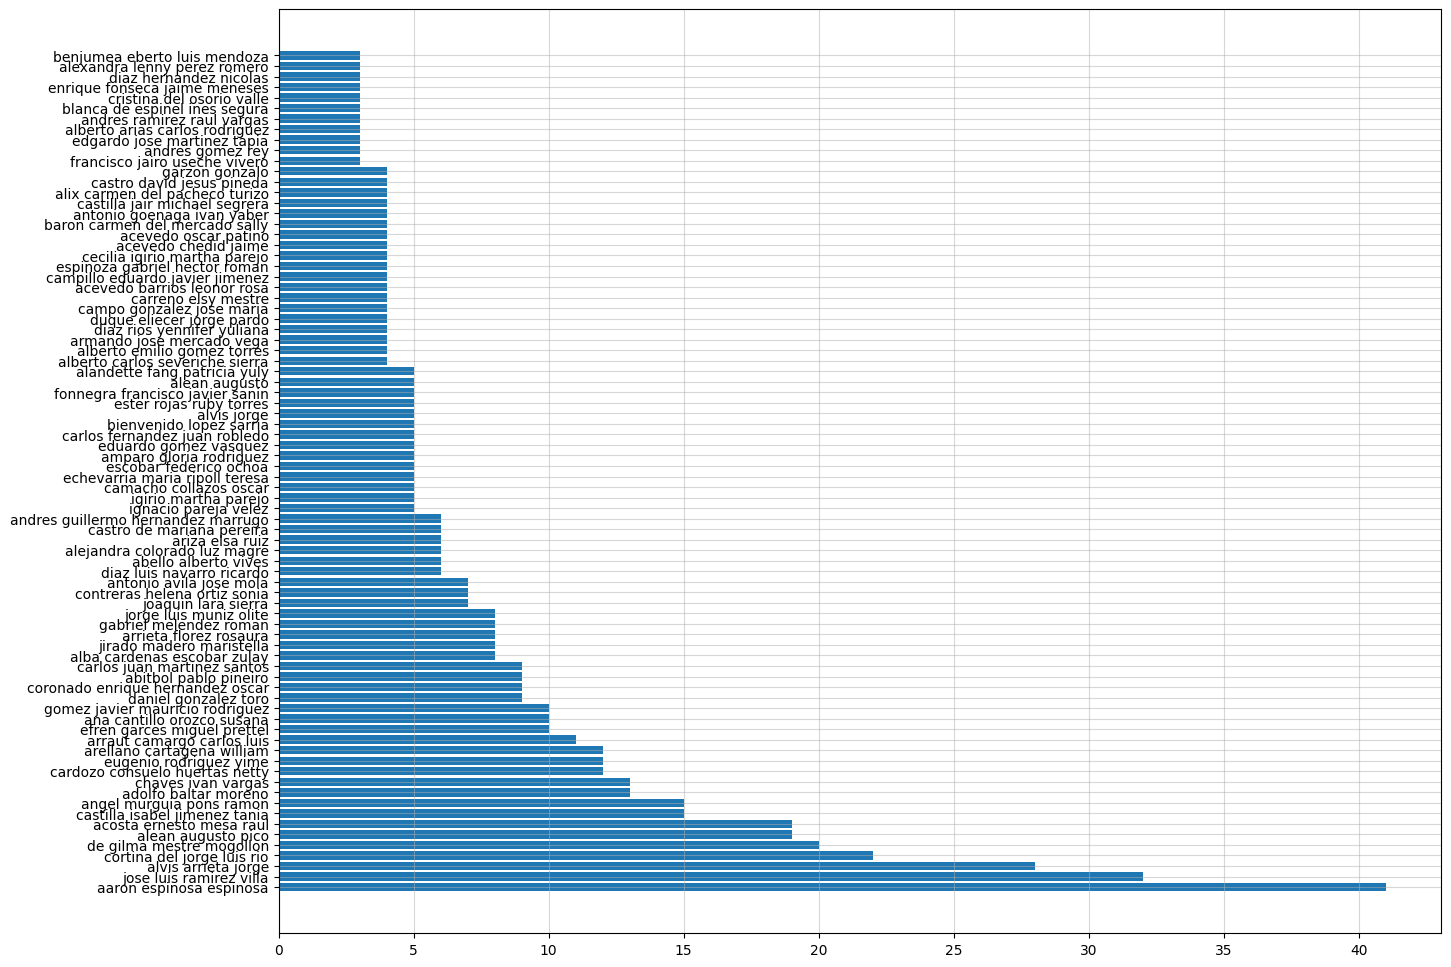

In [30]:
plt.figure(figsize=(15,12))
plt.barh(conteo_autores_libros1[:80]["Autor"],conteo_autores_libros1[:80]["Suma"])
plt.grid(alpha=0.5)
plt.show()